# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [77]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [78]:
f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="+cities[0]

'https://api.openweathermap.org/data/2.5/weather?appid=f882bf6f23c374511086f491b39e096b&units=imperial&q=albany'

In [79]:
city=cities[0]
city

'albany'

In [80]:
city_url=f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
response=requests.get(city_url)
city_weather=response.json()
city_weather

{'coord': {'lon': -73.9662, 'lat': 42.6001},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 40.37,
  'feels_like': 38.79,
  'temp_min': 37.58,
  'temp_max': 43.21,
  'pressure': 1005,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 300, 'gust': 5.01},
 'clouds': {'all': 27},
 'dt': 1701116451,
 'sys': {'type': 2,
  'id': 19530,
  'country': 'US',
  'sunrise': 1701086497,
  'sunset': 1701120337},
 'timezone': -18000,
 'id': 5106841,
 'name': 'Albany',
 'cod': 200}

In [81]:
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_lat = city_weather["coord"]["lat"]
#city_lat = city_weather.get("coord",{}).get("lat",None)

city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_date = city_weather["dt"]

In [82]:
# Append the City information into city_data list
{"City": city, 
      "Lat": city_lat, 
      "Lng": city_lng, 
      "Max Temp": city_max_temp,
      "Humidity": city_humidity,
      "Cloudiness": city_clouds,
      "Wind Speed": city_wind,
      "Country": city_country,
      "Date": city_date}

{'City': 'albany',
 'Lat': 42.6001,
 'Lng': -73.9662,
 'Max Temp': 43.21,
 'Humidity': 60,
 'Cloudiness': 27,
 'Wind Speed': 3,
 'Country': 'US',
 'Date': 1701116451}

In [83]:
city_weather.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [84]:
city_weather["coord"]

{'lon': -73.9662, 'lat': 42.6001}

In [85]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url=f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response=requests.get(city_url)
    
    try:
        # Parse the JSON and retrieve data
        city_weather=response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print("City {city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | puerto ayacucho
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | andovoranto
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | fale old settlement
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | mikomeseng
Processing Record 10 of Set 1 | ad dabbah
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | igrim
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | puerto san carlos
'coord'
City {city} not found. Skipping...
Processing Record 16 of Set 1 | badger
Processing Record 17 of Set 1 | tangalle
Processing Record 18 of Set 1 | urbano santos
Processing Record 19 of Set 1 | vorgashor
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of S

Processing Record 42 of Set 4 | whitehorse
Processing Record 43 of Set 4 | nadi
Processing Record 44 of Set 4 | robore
Processing Record 45 of Set 4 | petropavlovsk-kamchatsky
Processing Record 46 of Set 4 | iturama
Processing Record 47 of Set 4 | fortuna
Processing Record 48 of Set 4 | kargopol'
Processing Record 49 of Set 4 | taiohae
'coord'
City {city} not found. Skipping...
Processing Record 0 of Set 5 | ust-nera
Processing Record 1 of Set 5 | jamestown
Processing Record 2 of Set 5 | as sulayyil
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | hayma'
'coord'
City {city} not found. Skipping...
Processing Record 5 of Set 5 | pangody
Processing Record 6 of Set 5 | vorotynets
Processing Record 7 of Set 5 | anloga
Processing Record 8 of Set 5 | wewak
Processing Record 9 of Set 5 | homer
Processing Record 10 of Set 5 | khorixas
Processing Record 11 of Set 5 | yerkoy
Processing Record 12 of Set 5 | chongqing
Processing Record 13 of Set 5 | thompson
Processing Rec

Processing Record 35 of Set 8 | nuuk
Processing Record 36 of Set 8 | belmonte
Processing Record 37 of Set 8 | khanapur
Processing Record 38 of Set 8 | barra de santo antonio
Processing Record 39 of Set 8 | sungailiat
Processing Record 40 of Set 8 | kristiansund
Processing Record 41 of Set 8 | xudat
Processing Record 42 of Set 8 | flying fish cove
Processing Record 43 of Set 8 | aginskoye
Processing Record 44 of Set 8 | bougouni
Processing Record 45 of Set 8 | jiaojiang
Processing Record 46 of Set 8 | key west
Processing Record 47 of Set 8 | tieli
Processing Record 48 of Set 8 | kayangel
Processing Record 49 of Set 8 | labytnangi
Processing Record 0 of Set 9 | kalix
Processing Record 1 of Set 9 | lorengau
Processing Record 2 of Set 9 | kosum phisai
Processing Record 3 of Set 9 | culpeper
Processing Record 4 of Set 9 | san luis de la loma
Processing Record 5 of Set 9 | kone
Processing Record 6 of Set 9 | buka
Processing Record 7 of Set 9 | belsand
Processing Record 8 of Set 9 | santa ros

Processing Record 17 of Set 12 | salvador
Processing Record 18 of Set 12 | vila franca do campo
Processing Record 19 of Set 12 | charters towers
Processing Record 20 of Set 12 | mejit
Processing Record 21 of Set 12 | turnov
Processing Record 22 of Set 12 | durban
Processing Record 23 of Set 12 | nguruka
Processing Record 24 of Set 12 | karibib
Processing Record 25 of Set 12 | constitucion
Processing Record 26 of Set 12 | merizo village
Processing Record 27 of Set 12 | vadso
Processing Record 28 of Set 12 | parkes
Processing Record 29 of Set 12 | zemio
Processing Record 30 of Set 12 | miles city
Processing Record 31 of Set 12 | sinabang
Processing Record 32 of Set 12 | kati
Processing Record 33 of Set 12 | okha
Processing Record 34 of Set 12 | kon tum
Processing Record 35 of Set 12 | itapecuru mirim
Processing Record 36 of Set 12 | thurso
Processing Record 37 of Set 12 | padang
Processing Record 38 of Set 12 | graham
Processing Record 39 of Set 12 | oltinko'l
---------------------------

In [86]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [87]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,43.21,60,27,3.00,US,1701116451
1,waitangi,-43.9535,-176.5597,53.82,90,100,3.00,NZ,1701116511
2,puerto ayacucho,5.6639,-67.6236,87.06,68,49,2.10,VE,1701116512
3,ilulissat,69.2167,-51.1000,26.62,80,75,12.66,GL,1701116513
4,andovoranto,-18.9500,49.1000,74.46,89,13,6.04,MG,1701116514


In [88]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [89]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,43.21,60,27,3.00,US,1701116451
1,waitangi,-43.9535,-176.5597,53.82,90,100,3.00,NZ,1701116511
2,puerto ayacucho,5.6639,-67.6236,87.06,68,49,2.10,VE,1701116512
3,ilulissat,69.2167,-51.1000,26.62,80,75,12.66,GL,1701116513
4,andovoranto,-18.9500,49.1000,74.46,89,13,6.04,MG,1701116514


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

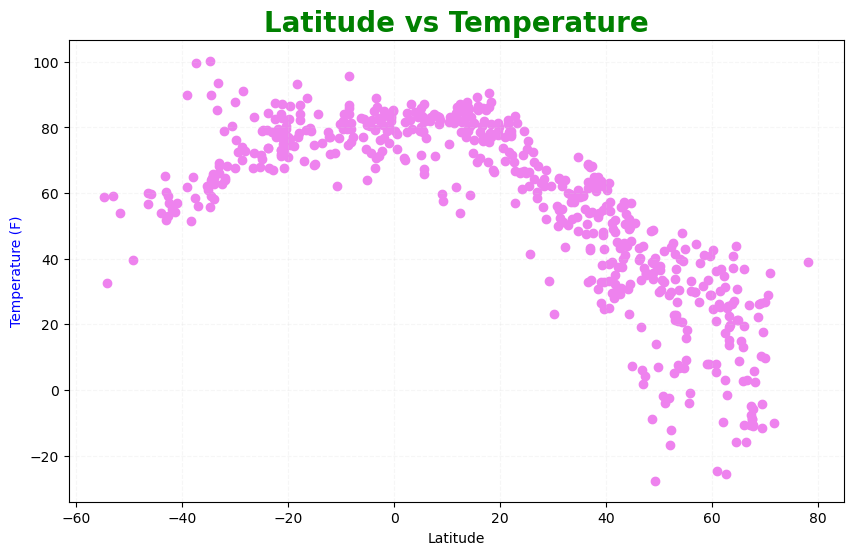

In [90]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="violet",)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)",color="blue")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=20, color="green")
plt.grid(color="lightgrey", alpha=0.2, linestyle="--")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

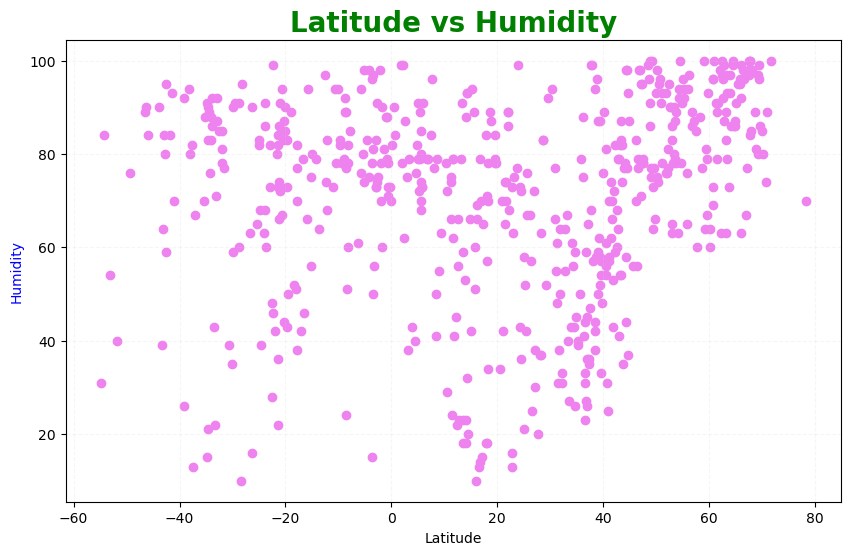

In [91]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Humidity"], color="violet",)
plt.xlabel("Latitude")
plt.ylabel("Humidity",color="blue")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=20, color="green")
plt.grid(color="lightgrey", alpha=0.2, linestyle="--")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

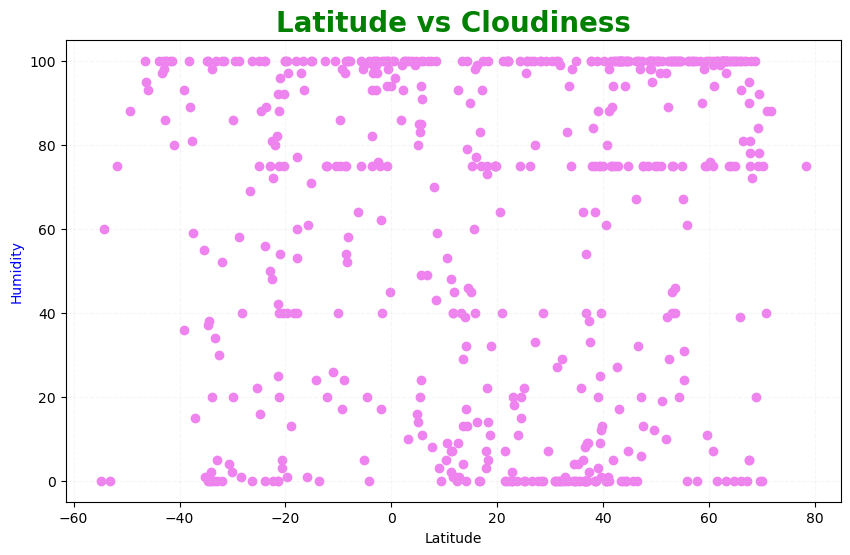

In [92]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Cloudiness"], color="violet",)
plt.xlabel("Latitude")
plt.ylabel("Humidity",color="blue")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=20, color="green")
plt.grid(color="lightgrey", alpha=0.2, linestyle="--")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

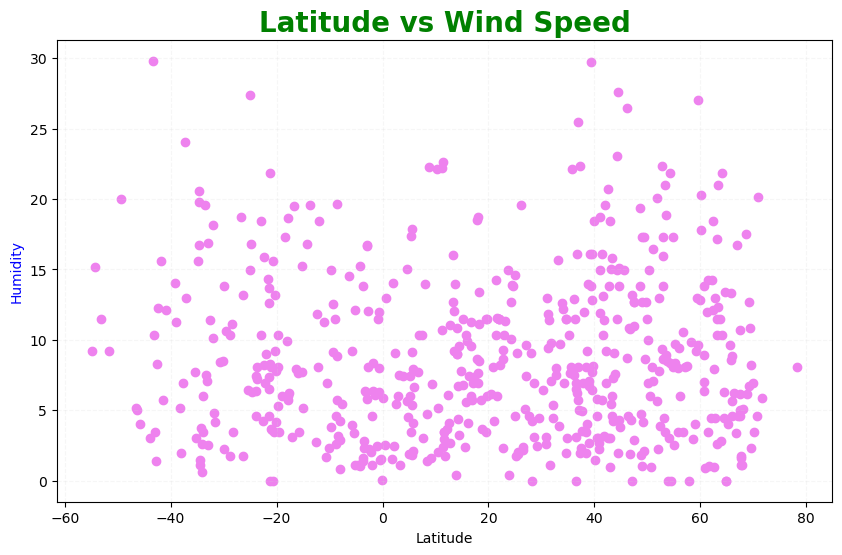

In [93]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="violet",)
plt.xlabel("Latitude")
plt.ylabel("Humidity",color="blue")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=20, color="green")
plt.grid(color="lightgrey", alpha=0.2, linestyle="--")



# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [94]:
# Define a function to create Linear Regression plots
def makeLinearRegressionPlot(x_values, y_values, y_col, hemi, annot_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # make plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annot_loc,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_col}')
    plt.title(f'Lat vs {y_col} ({hemi} Hemi)')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [95]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat>= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,43.21,60,27,3.00,US,1701116451
2,puerto ayacucho,5.6639,-67.6236,87.06,68,49,2.10,VE,1701116512
3,ilulissat,69.2167,-51.1000,26.62,80,75,12.66,GL,1701116513
5,lihue,21.9789,-159.3672,78.04,86,100,11.50,US,1701116258
7,wailua homesteads,22.0669,-159.3780,77.43,89,100,11.50,US,1701116516


In [96]:
northern_hemi_df.count()

City          394
Lat           394
Lng           394
Max Temp      394
Humidity      394
Cloudiness    394
Wind Speed    394
Country       394
Date          394
dtype: int64

In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df.Lat< 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,53.82,90,100,3.00,NZ,1701116511
4,andovoranto,-18.9500,49.1000,74.46,89,13,6.04,MG,1701116514
6,fale old settlement,-9.3852,-171.2468,83.97,78,98,12.57,TK,1701116515
10,edinburgh of the seven seas,-37.0676,-12.3116,56.10,67,15,13.00,SH,1701116392
13,adamstown,-25.0660,-130.1015,71.56,82,100,27.38,PN,1701116388


In [98]:
southern_hemi_df.count()

City          176
Lat           176
Lng           176
Max Temp      176
Humidity      176
Cloudiness    176
Wind Speed    176
Country       168
Date          176
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7451304643693895


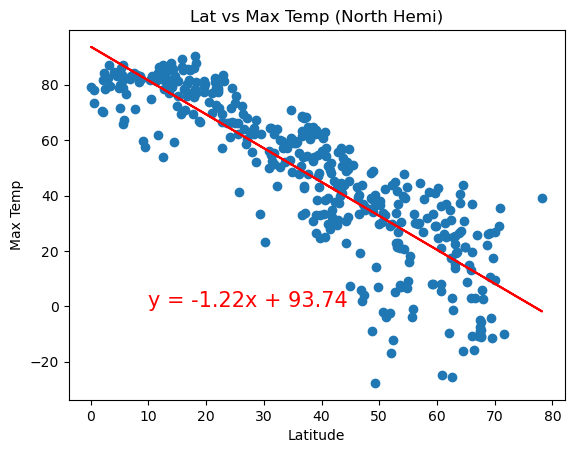

In [107]:
# Linear regression on Northern Hemisphere
# Print out the r-squared value along with the plot.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

makeLinearRegressionPlot(x_values,y_values, "Max Temp","North",(10,0))

The r-squared is: 0.37583946802353374


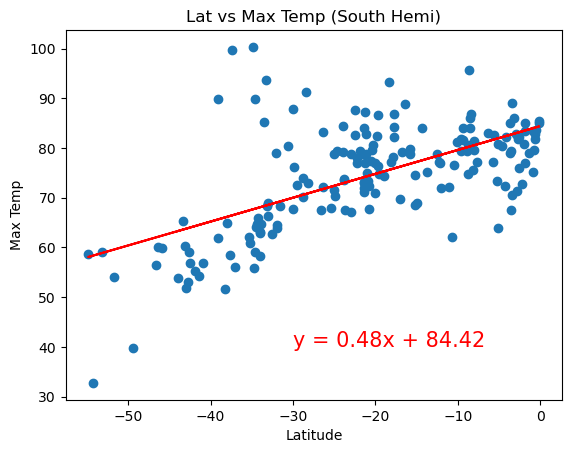

In [108]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

makeLinearRegressionPlot(x_values,y_values, "Max Temp","South",(-30,40))

**Discussion about the linear relationship:** There is a correlation between Temperature and Latitude. The closer you are to the Ecuator Line, the higher the temperatures will be and this is the case for both the Northern and Southern Hemispheres. On an additional note, the Northern Hmi has a stronger correlation with an r square value of 0.75

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.15551306425952918


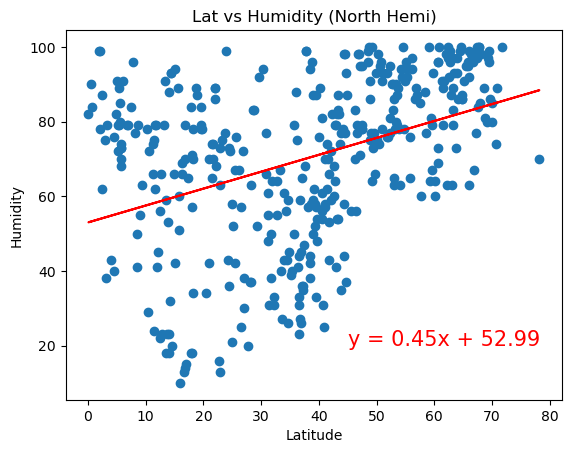

In [110]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

makeLinearRegressionPlot(x_values,y_values, "Humidity","North",(45,20))

The r-squared is: 0.016565448219430692


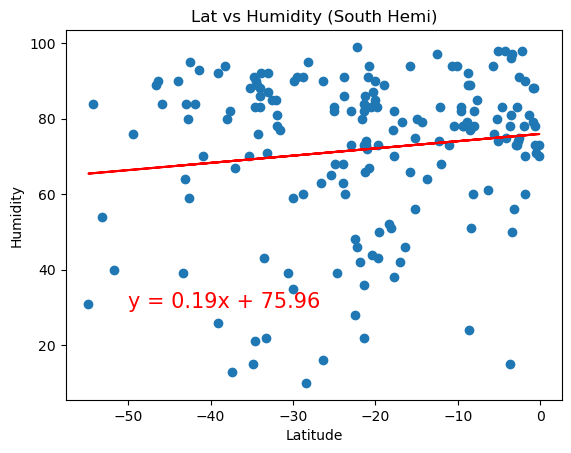

In [112]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

makeLinearRegressionPlot(x_values,y_values, "Humidity","South",(-50,30))

**Discussion about the linear relationship:** There is no significant correlation between the Humidity and Latidute. Both the Northern and Southern Hemispheres have rather flat regression lines and small r square values

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04790629294734402


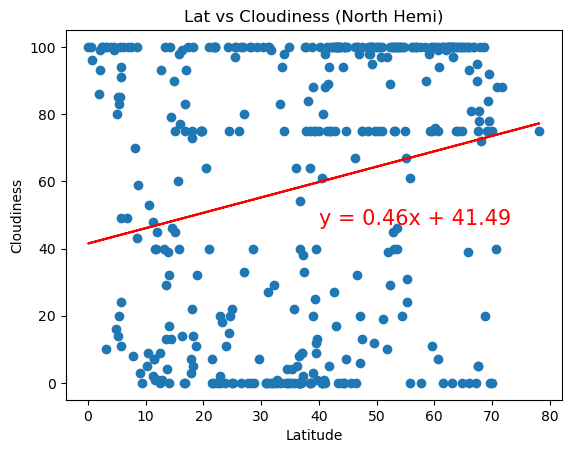

In [115]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

makeLinearRegressionPlot(x_values,y_values, "Cloudiness","North",(40,47))

The r-squared is: 0.028757350972220694


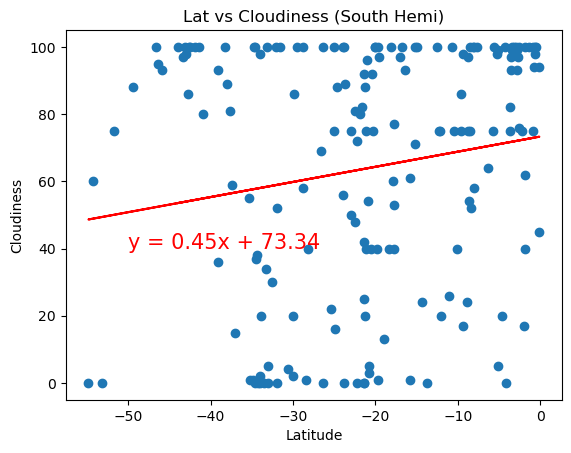

In [104]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

makeLinearRegressionPlot(x_values,y_values, "Cloudiness","South",(-50,40))

**Discussion about the linear relationship:** There is no significant correlation between the Claudiness and Latidute. Both the Northern and Southern Hemispheres have r square values close to zero

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.004718209608683815


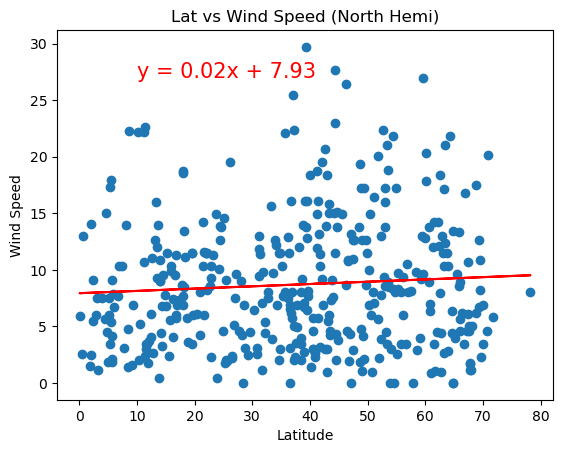

In [117]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

makeLinearRegressionPlot(x_values,y_values, "Wind Speed","North",(10,27))

The r-squared is: 0.03872481036818382


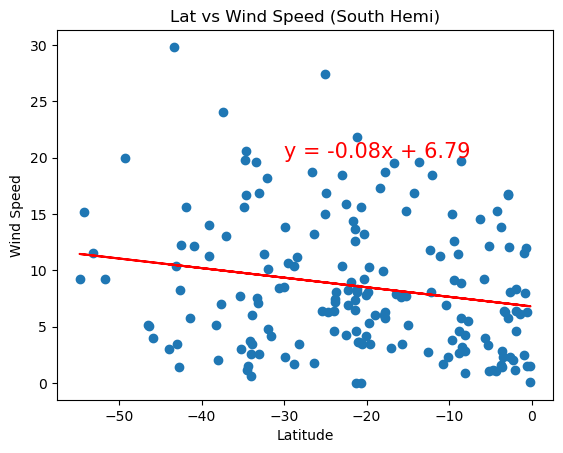

In [118]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

makeLinearRegressionPlot(x_values,y_values, "Wind Speed","South",(-30,20))

**Discussion about the linear relationship:** There is no significant correlation between the Wind Speed and Latidute. Both the Northern and Southern Hemispheres have r square values close to zero and very flat regresion lines